#Recognition of human activity

### Welcome to the  create notebook of Artificial Inteligence model

In [11]:
#importing all libraries and functions necesary
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
import plotly.express as px

In [2]:
#conect with drive and clone the repositorie
drive.mount("/content/drtive")

!git clone https://github.com/Nahuel404/Reconocimiento_human_activity.git /content/drive/MyDrive/Reconocimiento_human_activity

os.chdir('/content/drive/MyDrive/Reconocimiento_human_activity/UCI HAR Dataset/')

Mounted at /content/drtive
Cloning into '/content/drive/MyDrive/Reconocimiento_human_activity'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 62 (delta 5), reused 18 (delta 2), pack-reused 36
Receiving objects: 100% (62/62), 83.84 MiB | 17.69 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (34/34), done.


In [5]:
#assign the datasets
Xtrain = np.array(pd.read_csv('../Datasets_Final/Xtrain.csv'))
Xtest = np.array(pd.read_csv('../Datasets_Final/Xtest.csv'))

Ytrain = np.array(pd.read_csv('./train/y_train.txt'))
Ytest = np.array(pd.read_csv('./test/y_test.txt'))

print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(7351, 561) (7351, 1) (2946, 561) (2946, 1)


In [8]:
# I applied PCA (Principal Components Analysis) algorithm to reduce the number of features
scaler = StandardScaler()
features_scaled_train = scaler.fit_transform(Xtrain)
features_scaled_test = scaler.transform(Xtest)

# Using PCA with 3 principal components
pca = PCA(n_components=3)
features_reduced_train = pca.fit_transform(features_scaled_train)
features_reduced_test = pca.transform(features_scaled_test)


In [13]:
train_df = pd.DataFrame(data=features_reduced_train, columns=['PC1', 'PC2', 'PC3'])
train_df['Data'] = 'Train Data'

test_df = pd.DataFrame(data=features_reduced_test, columns=['PC1', 'PC2', 'PC3'])
test_df['Data'] = 'Test Data'

combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Create a plot with plotly express
fig = px.scatter_3d(combined_df, x='PC1', y='PC2', z='PC3', color='Data', symbol='Data',
                    title='PCA - 3 Principal Components',
                    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'})

# show the interactive plot
fig.show()

In [14]:
#let's see each label and how many we have of each ones
unique_elements, counts = np.unique(Ytrain, return_counts=True)

values_train = dict(zip(unique_elements, counts))

unique_elements, counts = np.unique(Ytest, return_counts=True)

values_test = dict(zip(unique_elements, counts))

print(values_train, values_test)

{1: 1226, 2: 1073, 3: 986, 4: 1286, 5: 1373, 6: 1407} {1: 496, 2: 471, 3: 420, 4: 491, 5: 531, 6: 537}


In [15]:
#We applied "one hot encoding" to categorical classes
Ytrain_one_hot = to_categorical(Ytrain - 1, num_classes=6)
Ytest_one_hot = to_categorical(Ytest - 1, num_classes=6)

In [45]:
#Created five types of Neural Networks to evaluate the accuracy of each ones and select the better architecture
First_NN = Sequential([
    Dense(561, activation = 'relu'),
    Dense(256, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(64, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Second_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Third_NN = Sequential([
    Dense(561, activation = 'relu'),
    Dense(256, activation = "relu"),
    Dense(128, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Fourth_NN = Sequential([
    Dense(102, activation = 'relu'),
    Dense(102, activation = "relu"),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(6, activation = "softmax")
])

Fifth_NN = Sequential([
    Dense(561, activation = 'relu'),
    Dense(1024, activation = "relu"),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(6, activation = "softmax")
])

In [46]:
Xtrain.shape

(7351, 561)

In [47]:
First_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Second_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Third_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Fourth_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

Fifth_NN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)

In [ ]:
# Entrenamiento del primer modelo
history_first = First_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

In [ ]:
# Entrenamiento del segundo modelo
history_second = Second_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

In [ ]:
# Entrenamiento del tercer modelo
history_third = Third_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

In [ ]:
# Entrenamiento del cuarto modelo
history_fourth = Fourth_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

In [ ]:
# Entrenamiento del quinto modelo
history_fifth = Fifth_NN.fit(Xtrain, Ytrain_one_hot, epochs=100, batch_size=1000, validation_split=0.2)

In [24]:
epochs = np.arange(1,101)#array of the number of epochs

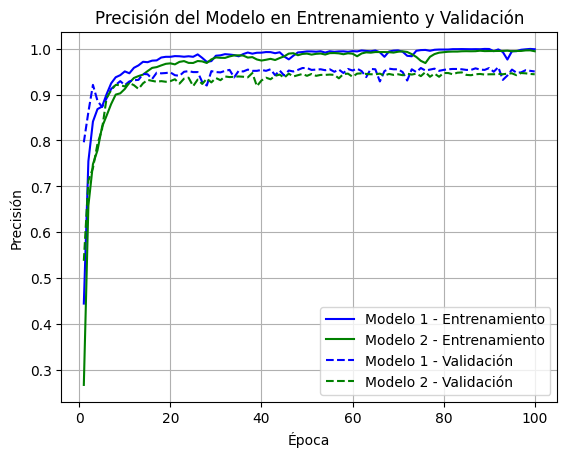

In [58]:
# Definir los datos
epochs = range(1, len(history_first.history['accuracy']) + 1)

# Precisión en entrenamiento
plt.plot(epochs, history_first.history['accuracy'], 'b', label='Modelo 1 - Entrenamiento')
plt.plot(epochs, history_second.history['accuracy'], 'g', label='Modelo 2 - Entrenamiento')


# Precisión en validación
plt.plot(epochs, history_first.history['val_accuracy'], 'b--', label='Modelo 1 - Validación')
plt.plot(epochs, history_second.history['val_accuracy'], 'g--', label='Modelo 2 - Validación')


# Configuraciones de la gráfica
plt.title('Precisión del Modelo en Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

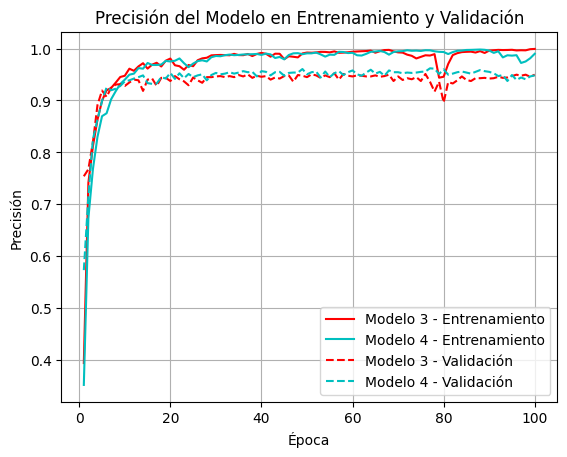

In [61]:
plt.plot(epochs, history_third.history['accuracy'], 'r', label='Modelo 3 - Entrenamiento')
plt.plot(epochs, history_fourth.history['accuracy'], 'c', label='Modelo 4 - Entrenamiento')

plt.plot(epochs, history_third.history['val_accuracy'], 'r--', label='Modelo 3 - Validación')
plt.plot(epochs, history_fourth.history['val_accuracy'], 'c--', label='Modelo 4 - Validación')

# Configuraciones de la gráfica
plt.title('Precisión del Modelo en Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

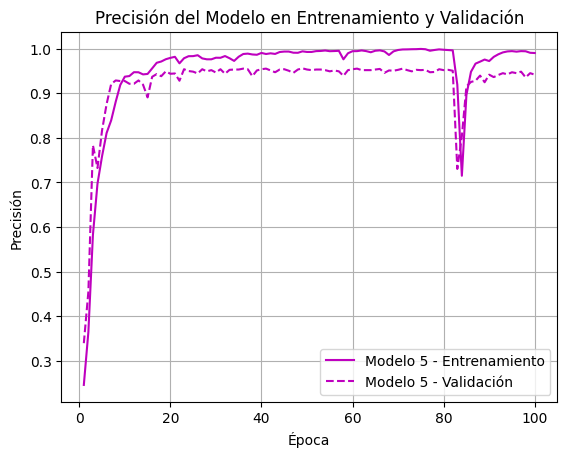

In [60]:
plt.plot(epochs, history_fifth.history['accuracy'], 'm', label='Modelo 5 - Entrenamiento')

plt.plot(epochs, history_fifth.history['val_accuracy'], 'm--', label='Modelo 5 - Validación')

# Configuraciones de la gráfica
plt.title('Precisión del Modelo en Entrenamiento y Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [63]:
# Evaluate the model on the test dataset
eval_results1 = First_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results1[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results1[1]}')
print(First_NN.summary())

93/93 [==============================] - 1s 14ms/step - loss: 0.3288 - accuracy: 0.9311
Pérdida en el conjunto de prueba: 0.3287975788116455
Precisión en el conjunto de prueba: 0.9310930371284485
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 561)               315282    
                                                                 
 dense_29 (Dense)            (None, 256)               143872    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 6)                 390       
                                                        

In [64]:
# Evaluate the model on the test dataset
eval_results2 = Second_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results2[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results2[1]}')
print(Second_NN.summary())

93/93 [==============================] - 1s 14ms/step - loss: 0.2823 - accuracy: 0.9338
Pérdida en el conjunto de prueba: 0.2823202610015869
Precisión en el conjunto de prueba: 0.9338085651397705
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 102)               57324     
                                                                 
 dense_34 (Dense)            (None, 128)               13184     
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 6)                 390       
                                                        

In [65]:
# Evaluate the model on the test dataset
eval_results3 = Third_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results3[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results3[1]}')
print(Third_NN.summary())

93/93 [==============================] - 2s 18ms/step - loss: 0.3121 - accuracy: 0.9280
Pérdida en el conjunto de prueba: 0.31212443113327026
Precisión en el conjunto de prueba: 0.9280380010604858
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 561)               315282    
                                                                 
 dense_39 (Dense)            (None, 256)               143872    
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dense_41 (Dense)            (None, 6)                 774       
                                                                 
Total params: 492824 (1.88 MB)
Trainable params: 492824 (1.88 MB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [66]:
# Evaluate the model on the test dataset
eval_results4 = Fourth_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results4[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results4[1]}')
print(Fourth_NN.summary())

93/93 [==============================] - 1s 15ms/step - loss: 0.2297 - accuracy: 0.9443
Pérdida en el conjunto de prueba: 0.2297133505344391
Precisión en el conjunto de prueba: 0.9443312883377075
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 102)               57324     
                                                                 
 dense_43 (Dense)            (None, 102)               10506     
                                                                 
 dense_44 (Dense)            (None, 256)               26368     
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 6)                 774       
                                                        

In [67]:
# Evaluate the model on the test dataset
eval_results5 = Fifth_NN.evaluate(Xtest, Ytest_one_hot)

# Print evaluation metrics
print(f'Pérdida en el conjunto de prueba: {eval_results5[0]}')
print(f'Precisión en el conjunto de prueba: {eval_results5[1]}')
print(Fifth_NN.summary())

93/93 [==============================] - 2s 17ms/step - loss: 0.3743 - accuracy: 0.9209
Pérdida en el conjunto de prueba: 0.37429264187812805
Precisión en el conjunto de prueba: 0.9209097027778625
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 561)               315282    
                                                                 
 dense_48 (Dense)            (None, 1024)              575488    
                                                                 
 dense_49 (Dense)            (None, 512)               524800    
                                                                 
 dense_50 (Dense)            (None, 256)               131328    
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                       

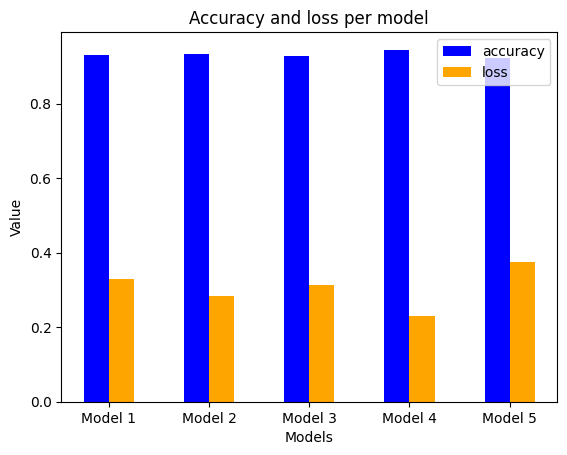

In [68]:
index = np.arange(1,6)
accuracy_values = [eval_results1[1], eval_results2[1], eval_results3[1], eval_results4[1], eval_results5[1]]
loss_values = [eval_results1[0], eval_results2[0], eval_results3[0], eval_results4[0], eval_results5[0]]
bar_width = 0.25
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Barra para la precisión
bar1 = ax.bar(index, accuracy_values, bar_width, label='accuracy', color='blue')

# Barra para la pérdida
bar2 = ax.bar(index + bar_width, loss_values, bar_width, label='loss', color='orange')

# Configuraciones de la gráfica
ax.set_xlabel('Models')
ax.set_ylabel('Value')
ax.set_title('Accuracy and loss per model')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()

# Mostrar el gráfico de barras
plt.show()

Best option is the fourth_NN because have an accuracy of 0.9443 in 1 second of compute

In [69]:
Fourth_NN.save('modelo_RHA.h5')#Save the model in a ".h5" archive

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [70]:
from google.colab import files #dowload in my PC
files.download('modelo_RHA.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>